In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# SPDR ETFs
assets = [
    'XLC',  # Communication Services
    'XLY',  # Consumer Discretionary
    'XLP',  # Consumer Staples
    'XLE',  # Energy
    'XLF',  # Financials
    'XLV',  # Health Care
    'XLI',  # Industrials
    'XLB',  # Materials
    'XLRE', # Real Estate
    'XLK',  # Technology
    'XLU',  # Utilities
    'SPY',  # S&P 500
    'BIL'   # 1-3 Month Treasury Bill
]

# Download data from Yahoo Finance since 2018-06-19
start = '2018-06-19'
data = {}
for ticker in assets:
    data[ticker] = yf.download(ticker, start=start)

# Calculate returns and drop the first row
for ticker in assets:
    data[ticker]['Return'] = data[ticker]['Adj Close'].pct_change().iloc[1:]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


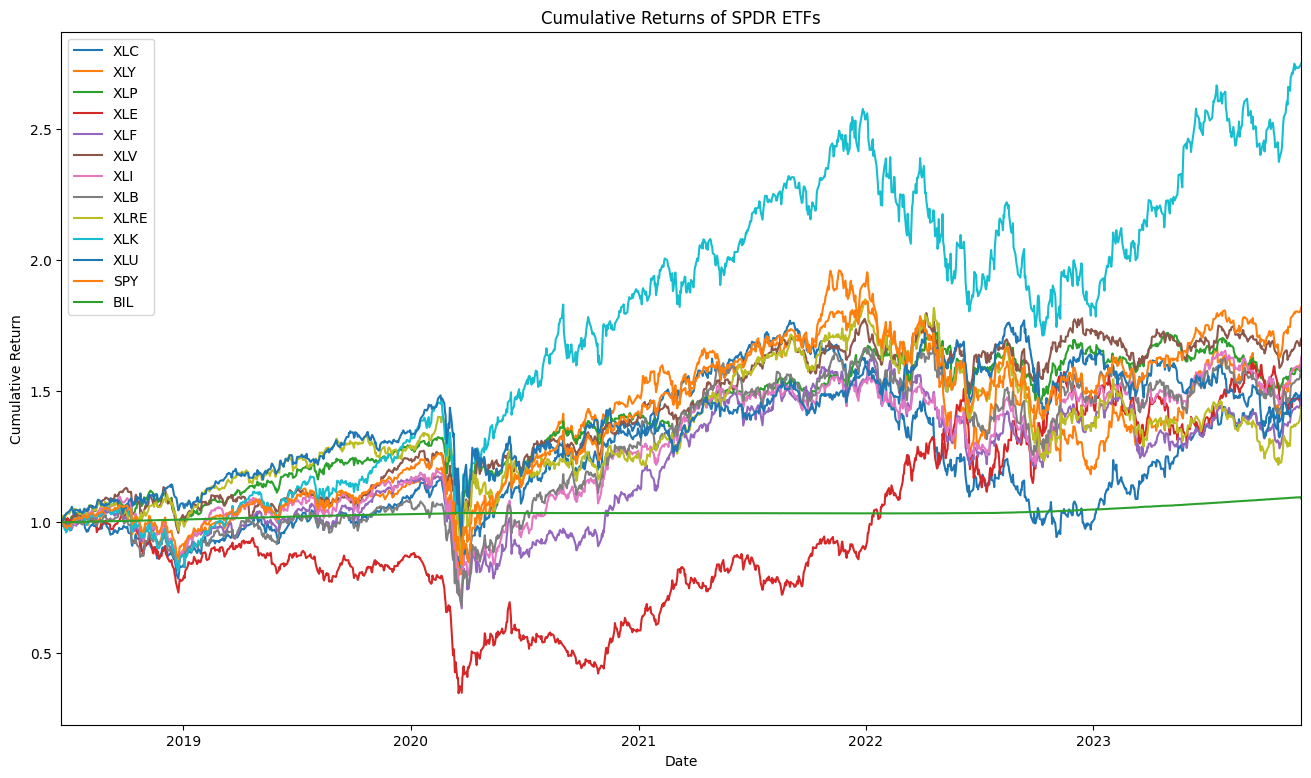

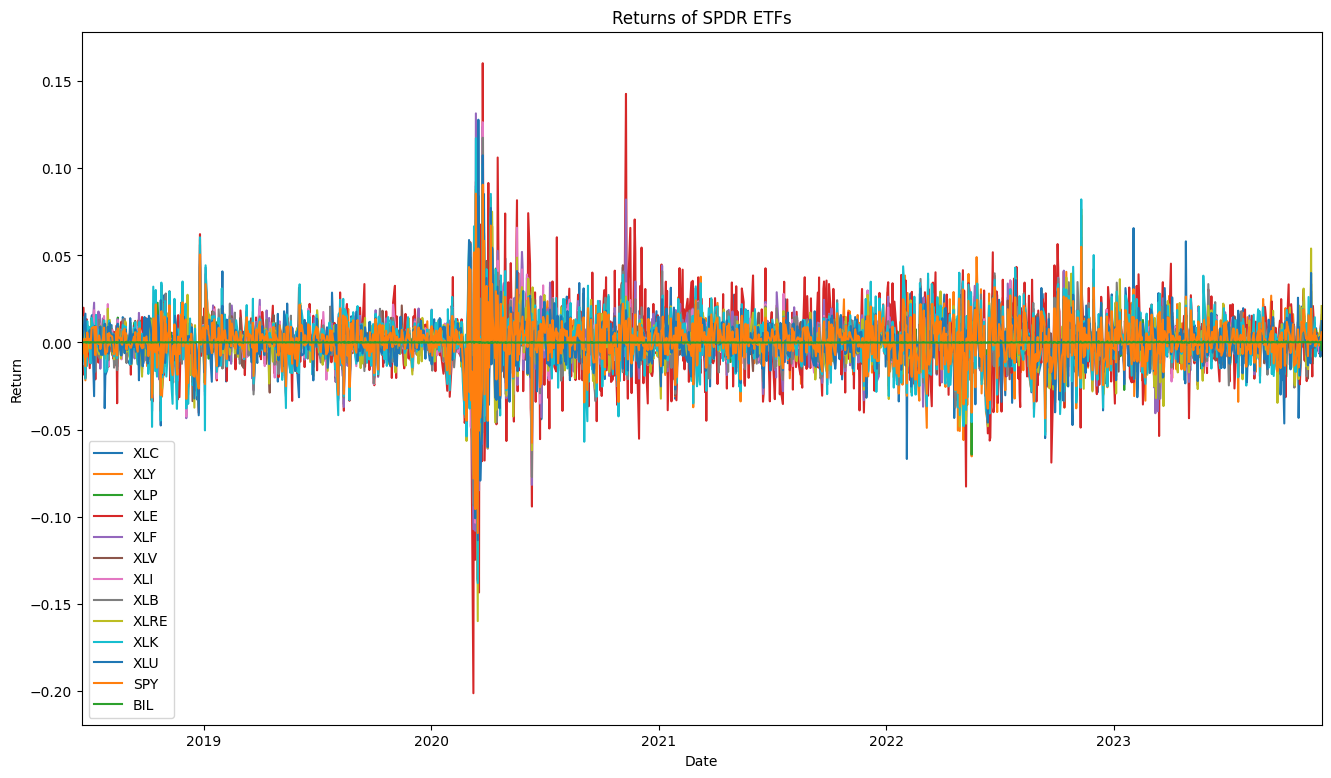

In [3]:
# Graph the cumulative returns
fig = px.line()
for ticker in assets:
    fig.add_scatter(x=data[ticker].index, y=(data[ticker]['Return']+1).cumprod(), name=ticker)
fig.update_layout(title='Cumulative Returns of SPDR ETFs',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Return')
fig.show()

# Graph the returns
fig = px.line()
for ticker in assets:
    fig.add_scatter(x=data[ticker].index, y=data[ticker]['Return'], name=ticker)
fig.update_layout(title='Returns of SPDR ETFs',
                  xaxis_title='Date',
                  yaxis_title='Return')
fig.show()

# Graph both using matplotlib
fig, ax = plt.subplots(figsize=(16, 9))
for ticker in assets:
    ax.plot(data[ticker].index, (data[ticker]['Return']+1).cumprod(), label=ticker)
ax.legend()
ax.set_title('Cumulative Returns of SPDR ETFs')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.set_xlim([pd.to_datetime('2018-06-19'), pd.to_datetime('2023-12-1')])
plt.show()

fig, ax = plt.subplots(figsize=(16, 9))
for ticker in assets:
    ax.plot(data[ticker].index, data[ticker]['Return'], label=ticker)
ax.legend()
ax.set_title('Returns of SPDR ETFs')
ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.set_xlim([pd.to_datetime('2018-06-19'), pd.to_datetime('2023-12-1')])
plt.show()

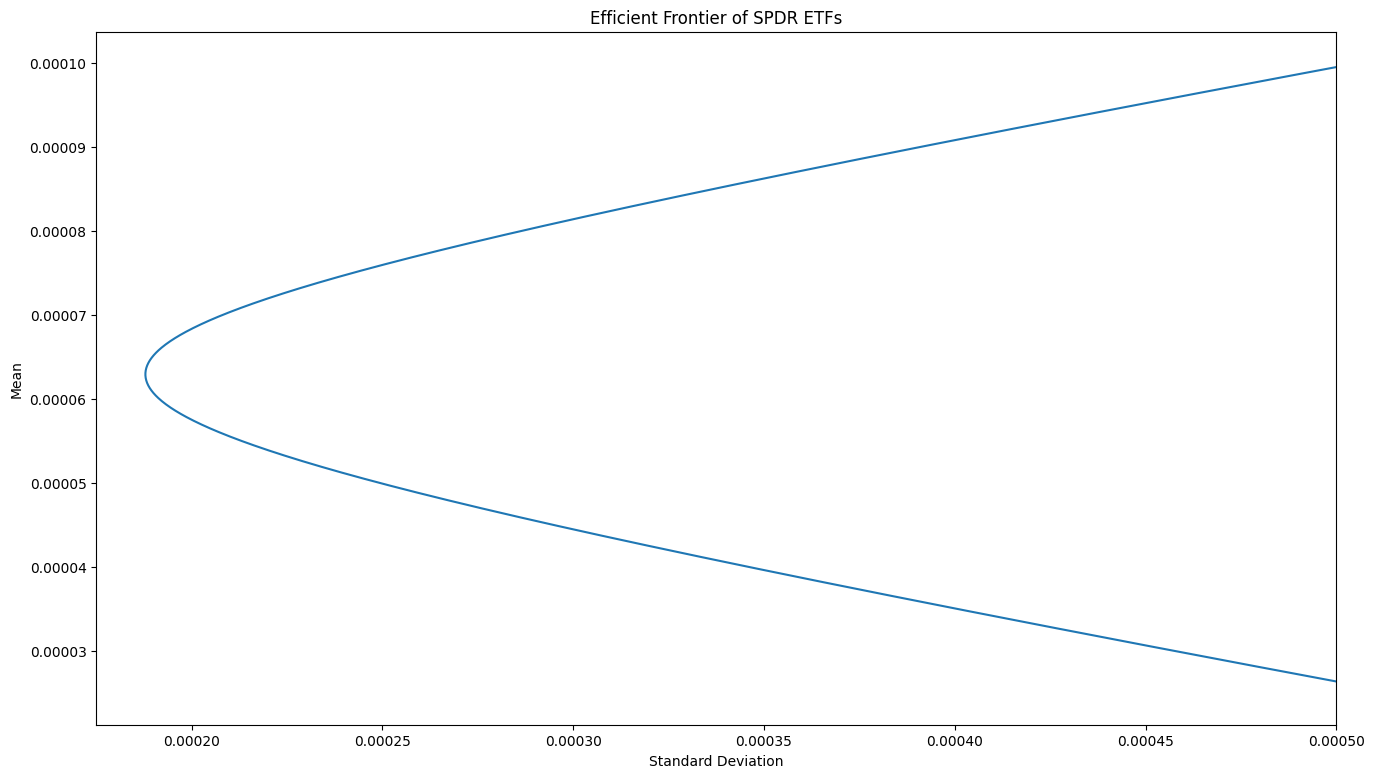

In [4]:
from functions import optimal_portfolio

# Calculate the mean and covariance matrix of returns
returns = pd.DataFrame()
for ticker in assets:
    returns[ticker] = data[ticker]['Return']
m = returns.mean()
sigma = returns.cov()

# Graph the efficient frontier 
means = np.linspace(0.000025, 0.0001, 1000)
variances = np.vectorize(lambda mu: optimal_portfolio(m, sigma, mu)[1])(means)
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(np.sqrt(variances), means)
ax.set_title('Efficient Frontier of SPDR ETFs')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Mean')
ax.set_xlim(0.000175, 0.0005)
plt.show()